# **Projet de Classification des objets**

### Classifier les objets en différentes catégories basées sur leur forme, taille, couleur, et d'autres caractéristiques mesurables.

### Pour la classification des objets célestes en astrophysique, un modèle basé sur des réseaux de neurones convolutifs (CNN) est souvent utilisé en raison de sa capacité à extraire efficacement les caractéristiques des images

In [2]:
# Librairie nécessaire
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFile

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array, load_img
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import ssl

import pandas as pd
from collections import Counter

#### Dataset

In [3]:
#Dataset
path = "/Users/nelson/Documents/workspace/astro/hst"
file = os.listdir(path)
data = file
print(data)

['heic0910h.tif', 'heic0206a.tif', 'opo0123a.tif', 'heic0601a.tif', 'heic1712a.tif', 'heic0910i.tif', 'potw1020a.tif', 'heic1323a.tif', 'potw1811a.tif', 'heic1118a.tif', 'potw1542a.tif', 'heic0206b.tif', 'heic1509a.tif', 'potw1714a.tif', 'heic0206c.tif', 'heic1708a.tif', 'opo0006a.tif', 'heic0904f.tif', 'opo0010a.tif', 'potw1345a.tif', 'potw1451a.tif', 'heic0817a.tif', 'heic0905a.tif', 'heic1302a.tif', 'heic1713a.tif', 'heic1007a.tif', 'heic0719a.tif', 'heic0109a.tif', 'opo0328a.tif', 'opo9607a.tif', 'heic1811a.tif', 'heic1104a.tif', 'heic0715a.tif', 'heic1503a.tif', 'potw1821a.tif', 'heic1305a.tif', 'heic0514a.tif', 'heic0406a.tif', 'opo9942a.tif', 'potw1752b.tif', 'heic0515a.tif', 'heic0503a.tif', 'heic0411a.tif', 'heic1105a.tif', 'heic1806a.tif', 'heic1410a.tif', 'opo0036a.tif', 'heic0702a.tif', 'heic1406a.tif', 'potw1752a.tif', 'heic0108a.tif', 'potw1441a.tif', 'heic1518a.tif', 'potw1751a.tif', 'opo9828c.tif', 'heic1608a.tif', 'potw1442a.tif', 'opo9941a.tif', 'heic1307a.tif', 'heic

In [4]:
#Fonction generique

#Affichage des images
def show_image(a):
    plt.imshow(a)
    #plt.title(title)
    plt.show()

#### **1. Prétraitement des données**

##### Prétraitement et analyse d'une seul image

/Users/nelson/Documents/workspace/astro/hst/heic1302a.tif


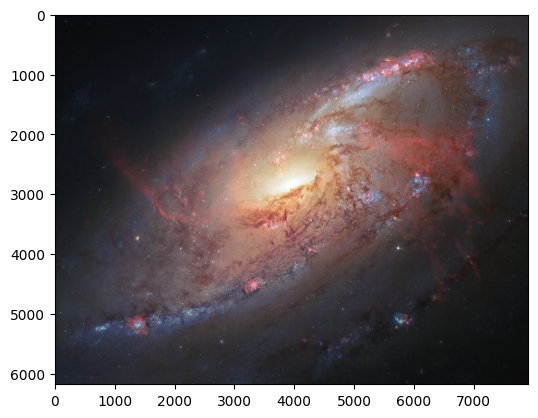

In [5]:
image_path = path+"/heic1302a.tif"
print(image_path)
image = Image.open(image_path)
show_image(image)

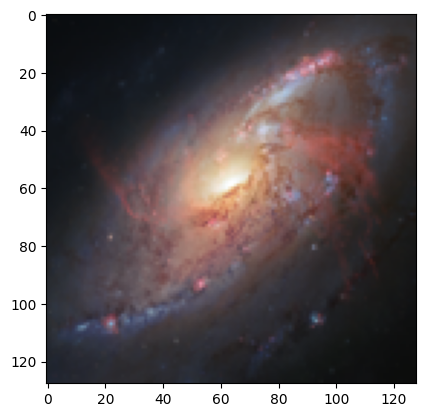

In [6]:
size = (128,128)
image_resized = image.resize(size)
show_image(image_resized)

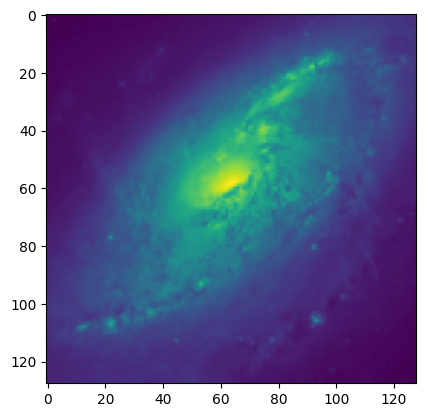

In [7]:
image_gray = image_resized.convert('L')
show_image(image_gray)

In [8]:
image_array = np.array(image_gray) / 255.0

##### Prétraitement et analyse de plusieurs images

In [9]:
print(path)

/Users/nelson/Documents/workspace/astro/hst


A METTRE DANS LE MÉMOIRE LA FONCTION de preprocessing()

In [10]:
def preprocess_image(image_path, size=(224, 224)):
    with Image.open(image_path) as img:
        img_resized = img.resize(size)
        img_gray = img_resized.convert('RGB')
        img_array = np.array(img_gray) / 255.0
        return img_array
    

Image.MAX_IMAGE_PIXELS = None

# Chemin vers le dossier contenant les images
path = "/Users/nelson/Documents/workspace/astro/hst"

images = []
for file in os.listdir(path):  # Ici, utilisez os.listdir(path)
    print("Fichier trouvé:", file)
    if file.endswith('.tif'):
        image_path = os.path.join(path, file)
        images.append(preprocess_image(image_path))

print(f"Nombre d'images chargées: {len(images)}")

Fichier trouvé: heic0910h.tif
Fichier trouvé: heic0206a.tif
Fichier trouvé: opo0123a.tif
Fichier trouvé: heic0601a.tif
Fichier trouvé: heic1712a.tif
Fichier trouvé: heic0910i.tif
Fichier trouvé: potw1020a.tif
Fichier trouvé: heic1323a.tif
Fichier trouvé: potw1811a.tif
Fichier trouvé: heic1118a.tif
Fichier trouvé: potw1542a.tif
Fichier trouvé: heic0206b.tif
Fichier trouvé: heic1509a.tif
Fichier trouvé: potw1714a.tif
Fichier trouvé: heic0206c.tif
Fichier trouvé: heic1708a.tif
Fichier trouvé: opo0006a.tif
Fichier trouvé: heic0904f.tif
Fichier trouvé: opo0010a.tif
Fichier trouvé: potw1345a.tif
Fichier trouvé: potw1451a.tif
Fichier trouvé: heic0817a.tif
Fichier trouvé: heic0905a.tif
Fichier trouvé: heic1302a.tif
Fichier trouvé: heic1713a.tif
Fichier trouvé: heic1007a.tif
Fichier trouvé: heic0719a.tif
Fichier trouvé: heic0109a.tif
Fichier trouvé: opo0328a.tif
Fichier trouvé: opo9607a.tif
Fichier trouvé: heic1811a.tif
Fichier trouvé: heic1104a.tif
Fichier trouvé: heic0715a.tif
Fichier trouvé:

In [11]:
images_batch = np.stack(images)
print(images_batch)

#Chargement du modèle
model = VGG16(weights='imagenet', include_top=False)
model.summary()
#On récupère les features de l'image
features = model.predict(images_batch)
print(features.shape)



[[[[0.05098039 0.04313725 0.04313725]
   [0.04705882 0.04313725 0.04705882]
   [0.04705882 0.04705882 0.04313725]
   ...
   [0.05490196 0.05098039 0.05098039]
   [0.05098039 0.05098039 0.04705882]
   [0.05490196 0.05098039 0.04705882]]

  [[0.05098039 0.04313725 0.03921569]
   [0.05098039 0.04705882 0.05098039]
   [0.04705882 0.04705882 0.04705882]
   ...
   [0.05490196 0.04705882 0.05098039]
   [0.05490196 0.05490196 0.05490196]
   [0.0627451  0.05882353 0.0627451 ]]

  [[0.04705882 0.04705882 0.04313725]
   [0.04705882 0.04313725 0.04705882]
   [0.05098039 0.04705882 0.03921569]
   ...
   [0.05882353 0.05882353 0.05882353]
   [0.07058824 0.0627451  0.05882353]
   [0.05490196 0.05098039 0.04705882]]

  ...

  [[0.05882353 0.05490196 0.03921569]
   [0.06666667 0.05882353 0.04705882]
   [0.06666667 0.05882353 0.05098039]
   ...
   [0.03921569 0.03921569 0.03529412]
   [0.03921569 0.03921569 0.03137255]
   [0.03921569 0.03921569 0.03137255]]

  [[0.07058824 0.0627451  0.05490196]
   [0.0

In [12]:
#Splitter les données pour les images processé intégré dans le batch 
def data_train(datatotrain):

    np.random.shuffle(datatotrain)

    total_images = len(datatotrain)
    train_size = int(0.7 * total_images)
    validation_size = int(0.15 * total_images)

    train = datatotrain[:train_size]
    validation = datatotrain[train_size:train_size + validation_size]
    test = datatotrain[train_size + validation_size:]

    return train, validation, test

train, validation, test = data_train(images_batch)

print(f"Nombre d'images d'entrainement: {len(train)}")
print(f"Nombre d'images de validation: {len(validation)}")
print(f"Nombre d'images de test: {len(test)}")

Nombre d'images d'entrainement: 69
Nombre d'images de validation: 14
Nombre d'images de test: 16


CODE A INTEGRÉ DANS LE MEMOIRE POUR LA PARTIE PREPROCESSING

### Appliquer un modéle de clustering K-Means au CNN afin de pouvoir labelisé les objets

In [13]:
ssl._create_default_https_context = ssl._create_unverified_context

model = VGG16(weights='imagenet', include_top=False)

image_1 = path+"/heic1302a.tif"


#traitement d'une seul image
def process_image(image_1):
    img = load_img(image_1, target_size=(224, 224))  # Redimensionner l'image
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img


print(process_image(image_1))

[[[[ -86.939     -98.779    -107.68    ]
   [ -87.939    -106.779    -110.68    ]
   [ -89.939    -102.779    -112.68    ]
   ...
   [ -53.939003  -69.779     -87.68    ]
   [ -55.939003  -68.779     -77.68    ]
   [ -47.939003  -72.779     -74.68    ]]

  [[ -88.939    -107.779    -116.68    ]
   [ -85.939    -109.779    -116.68    ]
   [ -88.939    -106.779    -114.68    ]
   ...
   [ -52.939003  -66.779     -77.68    ]
   [ -63.939003  -68.779     -73.68    ]
   [ -61.939003  -76.779     -70.68    ]]

  [[ -87.939    -106.779    -119.68    ]
   [ -86.939    -104.779    -120.68    ]
   [ -87.939    -100.779    -115.68    ]
   ...
   [ -51.939003  -62.779     -75.68    ]
   [ -60.939003  -72.779     -74.68    ]
   [ -64.939     -80.779     -84.68    ]]

  ...

  [[ -54.939003  -82.779     -95.68    ]
   [ -49.939003  -76.779     -95.68    ]
   [ -49.939003  -71.779     -89.68    ]
   ...
   [ -96.939    -110.779    -115.68    ]
   [ -90.939    -104.779    -117.68    ]
   [ -93.939    

Extraction des features du batch

In [14]:
features = model.predict(images_batch)

4/4 [==============================] - 18s 4s/step


In [15]:
#Splitter les données de features venant de VGG16 et les données du batch
train_features, validation_features, test_features = data_train(features)
print(f"Nombre d'images d'entrainement: {len(train_features)}")
print(f"Nombre d'images de validation_features: {len(validation_features)}")
print(f"Nombre d'images de test_features: {len(test_features)}")

Nombre d'images d'entrainement: 69
Nombre d'images de validation_features: 14
Nombre d'images de test_features: 16


In [16]:
print(features)

[[[[4.40332770e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.69837916e-01 0.00000000e+00]
   [3.60450834e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.94291294e-01 0.00000000e+00]
   [2.65870154e-01 0.00000000e+00 3.09706569e-01 ... 0.00000000e+00
    5.95687807e-01 0.00000000e+00]
   ...
   [3.25924397e-01 0.00000000e+00 2.11884230e-01 ... 0.00000000e+00
    6.09159231e-01 0.00000000e+00]
   [3.40378761e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.16803670e-01 0.00000000e+00]
   [2.60345221e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    8.99318337e-01 0.00000000e+00]]

  [[3.86230171e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    4.18022752e-01 0.00000000e+00]
   [7.96447620e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    5.93285143e-01 0.00000000e+00]
   [1.18810904e+00 0.00000000e+00 1.16875744e+00 ... 1.48075968e-01
    1.32106185e-01 0.00000000e+00]
   ...
   [1.15642667e+00 0.00000000e+00 1.16652274e+00 ... 1.47

In [28]:
#Prétraitement des données pour la reduction en 2 composantes principale
flattened_features = features.reshape(features.shape[0], -1)
reduced_data = pca.fit_transform(flattened_features)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

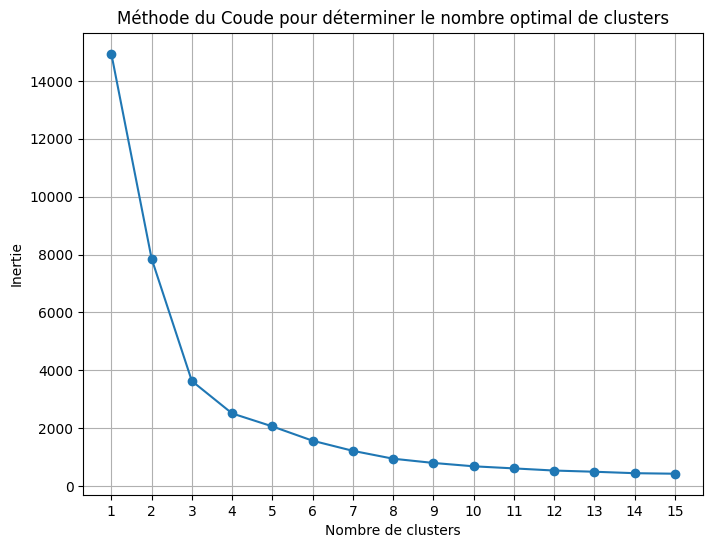

In [29]:
#Application de la méthode du coude pour définir le nombre de cluster optimale


inertias = []
K_range = range(1, 16)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertias.append(kmeans.inertia_)

# Affichage du graphique pour la méthode du coude
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertias, '-o')
plt.title('Méthode du Coude pour déterminer le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.xticks(K_range)
plt.grid(True)
plt.show()

Le nombre optimal de clusters selon la méthode du coude est : 4


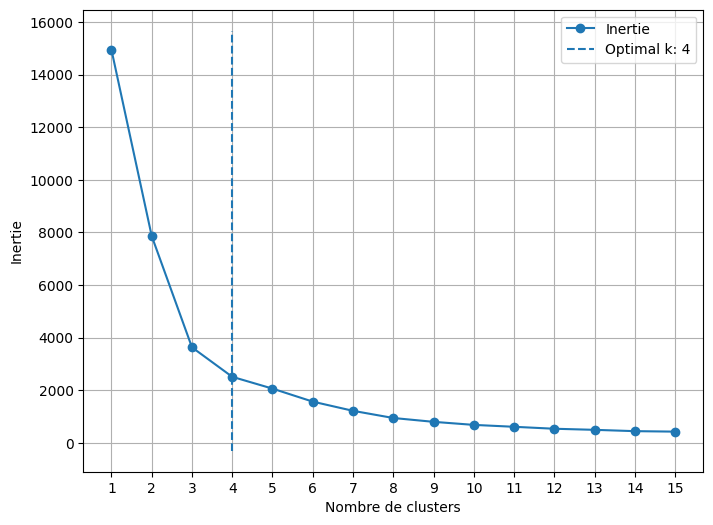

In [31]:
#Calcul du point d'inflexion exacte de la courbe en fonction des points données
from kneed import KneeLocator

knee_locator = KneeLocator(K_range, inertias, curve='convex', direction='decreasing')

optimal_k = knee_locator.knee
print(f"Le nombre optimal de clusters selon la méthode du coude est : {optimal_k}")

# Affichage du graphique avec le point d'inflexion
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertias, '-o', label='Inertie')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.xticks(K_range)
plt.grid(True)
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', label=f'Optimal k: {optimal_k}')
plt.legend()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


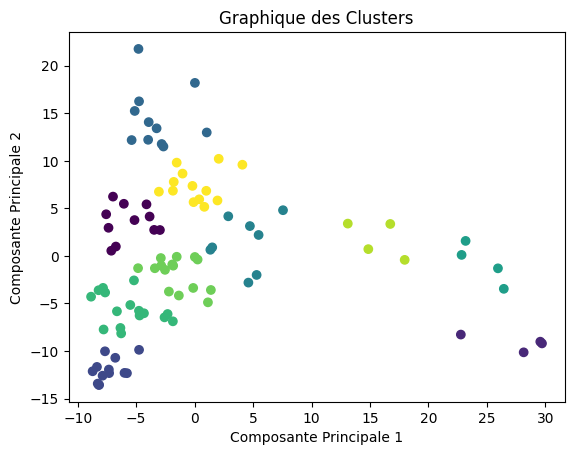

In [17]:


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(flattened_features)


n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(reduced_data)
cluster_labels = kmeans.labels_

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Graphique des Clusters')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()

In [18]:
cluster_to_label = {
    0: 'Objet 1',
    1: 'Objet 2',
    2: 'Objet 3',
    3: 'Objet 4',
    4: 'Objet 5',
    5: 'Objet 6',
    6: 'Objet 7',
    7: 'Objet 8',
    8: 'Objet 9',
    9: 'Objet 10'
}

text_labels = [cluster_to_label[label] for label in cluster_labels]
print(cluster_labels)

[7 6 2 7 6 9 3 1 7 6 3 9 8 7 0 4 7 6 4 0 6 2 3 2 7 3 6 7 7 8 1 9 9 5 0 9 7
 9 3 7 4 7 0 4 9 0 7 5 0 6 9 6 6 2 7 6 6 4 2 2 2 2 0 6 9 8 0 2 3 8 2 3 0 6
 4 2 3 5 9 4 4 7 3 2 0 3 6 6 2 9 3 9 5 7 1 9 6 1 0]


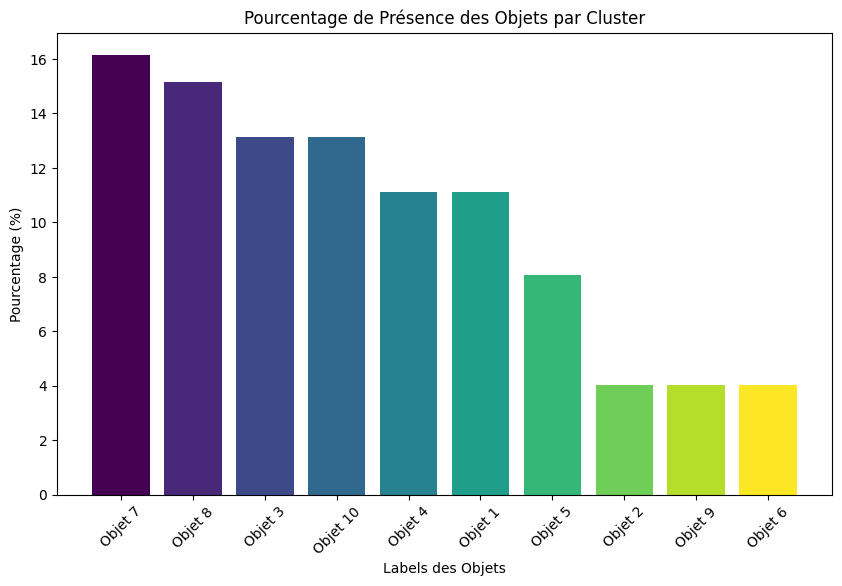

In [19]:
# Comptage du nombre d'occurrences pour chaque label
label_counts = Counter(text_labels)

# Tri des labels par leur nombre d'occurrences
sorted_labels = sorted(label_counts.items(), key=lambda item: item[1], reverse=True)

# Extraction des labels et des comptes pour le graphique
labels, counts = zip(*sorted_labels)
total_images = sum(counts)
percentages = [count / total_images * 100 for count in counts]

colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# Création d'un graphique à barres pour afficher les pourcentages
plt.figure(figsize=(10, 6))
plt.bar(labels, percentages, color=colors)
plt.title('Pourcentage de Présence des Objets par Cluster')
plt.xlabel('Labels des Objets')
plt.ylabel('Pourcentage (%)')
plt.xticks(rotation=45)
plt.show()

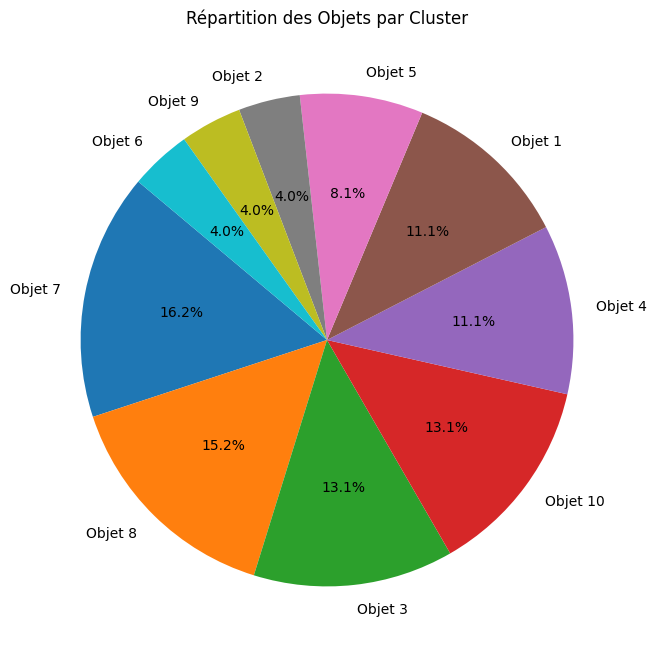

In [20]:
# Création d'un diagramme en camembert
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des Objets par Cluster')
plt.show()

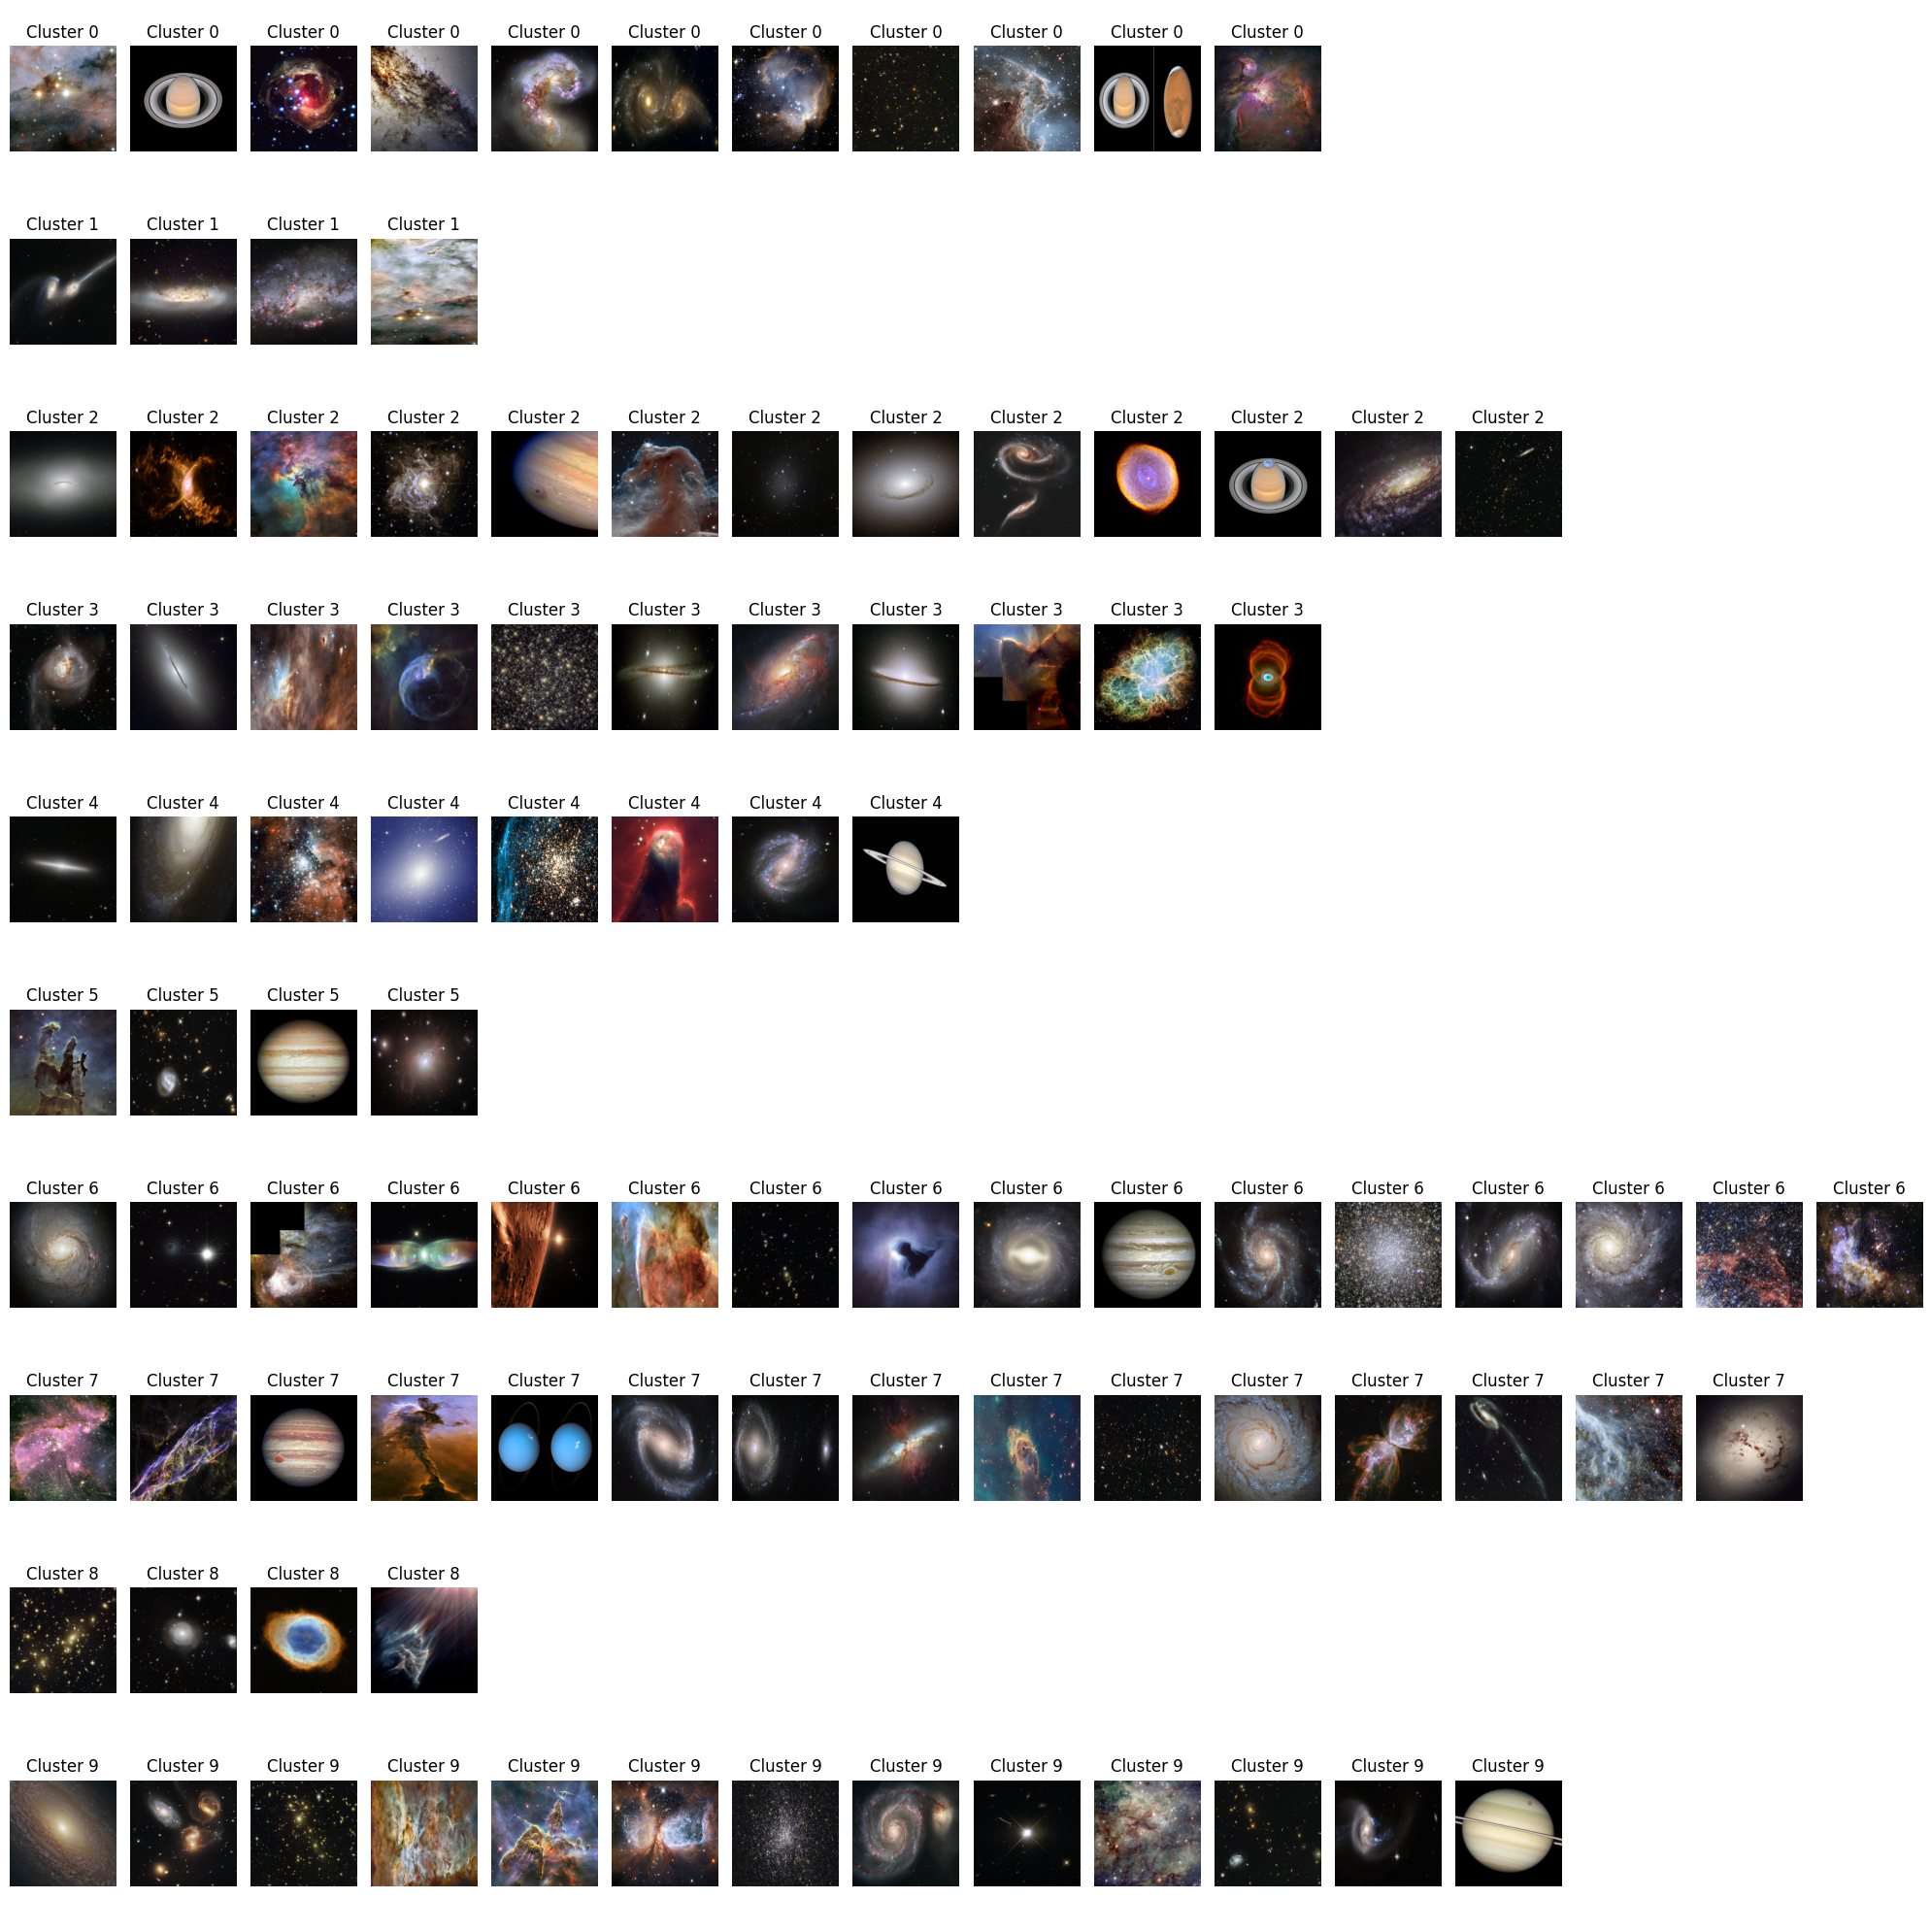

In [21]:
# Supposons que 'images_batch' est votre liste d'images et 'cluster_labels' les labels de clusters correspondants
# Supposons également que vous avez un nombre égal d'images dans chaque cluster pour simplifier le code
n_clusters = 10  # Nombre de clusters
images_per_row = 5  # Pour définir combien d'images vous voulez par ligne

# Vous devez obtenir les indices des images pour chaque cluster
# Pour ce faire, vous pouvez utiliser une structure de données pour les stocker
cluster_indices = {i: [] for i in range(n_clusters)}
for index, label in enumerate(cluster_labels):
    cluster_indices[label].append(index)

# Trouver le nombre maximum d'images par cluster pour définir le nombre de sous-graphiques par ligne
n_images_per_cluster = max(len(indices) for indices in cluster_indices.values())

fig, axs = plt.subplots(n_clusters, n_images_per_cluster, figsize=(20, 20), squeeze=False)

for cluster_num, indices in cluster_indices.items():
    for img_num in range(n_images_per_cluster):
        ax = axs[cluster_num, img_num]
        # Vérifiez si l'indice actuel existe dans la liste des indices pour le cluster
        if img_num < len(indices):
            img_index = indices[img_num]
            ax.imshow(images_batch[img_index])  # Afficher l'image
            ax.set_title(f'Cluster {cluster_num}')  # Définir le titre
        ax.axis('off')  # Désactiver les axes pour les graphiques sans image

plt.tight_layout()
plt.show()


In [22]:
for i in range(10):
    print(f"Cluster {i}: {cluster_indices[i]}")

Cluster 0: [14, 19, 34, 42, 45, 48, 62, 66, 72, 84, 98]
Cluster 1: [7, 30, 94, 97]
Cluster 2: [2, 21, 23, 53, 58, 59, 60, 61, 67, 70, 75, 83, 88]
Cluster 3: [6, 10, 22, 25, 38, 68, 71, 76, 82, 85, 90]
Cluster 4: [15, 18, 40, 43, 57, 74, 79, 80]
Cluster 5: [33, 47, 77, 92]
Cluster 6: [1, 4, 9, 17, 20, 26, 49, 51, 52, 55, 56, 63, 73, 86, 87, 96]
Cluster 7: [0, 3, 8, 13, 16, 24, 27, 28, 36, 39, 41, 46, 54, 81, 93]
Cluster 8: [12, 29, 65, 69]
Cluster 9: [5, 11, 31, 32, 35, 37, 44, 50, 64, 78, 89, 91, 95]


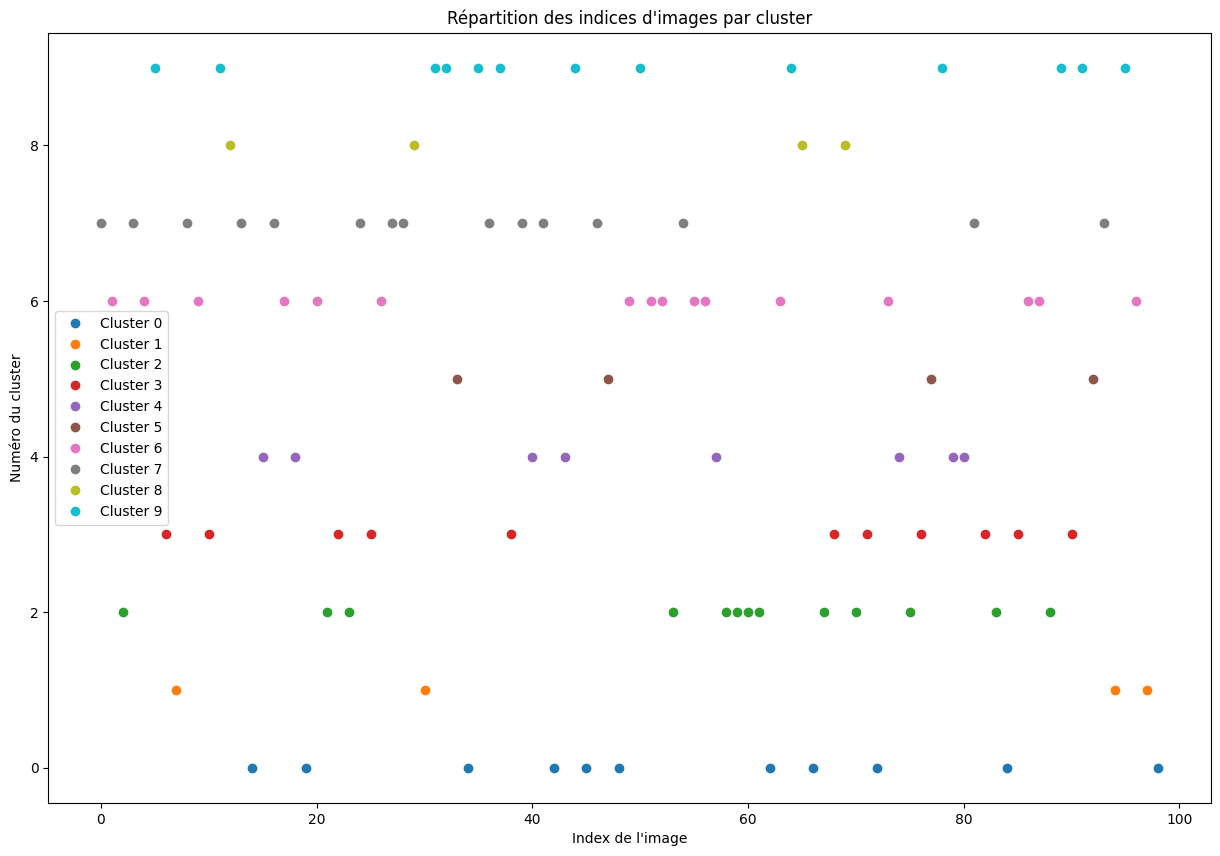

In [23]:
# Création du graphique plot
plt.figure(figsize=(15, 10))
for cluster, indices in cluster_indices.items():
    plt.plot(indices, [cluster] * len(indices), 'o', label=f'Cluster {cluster}', linestyle='')

plt.xlabel('Index de l\'image')
plt.ylabel('Numéro du cluster')
plt.title('Répartition des indices d\'images par cluster')
plt.legend()
plt.show()


In [24]:
# Exemple de données de clusters
clusters_data = {
    "Cluster 0": [20, 31, 35, 58, 69, 77, 84, 89],
    "Cluster 1": [0, 10, 12, 32, 33, 40, 51, 67, 75, 87, 88, 90, 91],
    "Cluster 2": [47, 74, 97, 98],
    "Cluster 3": [9, 17, 22, 28, 29, 42, 56, 68, 73, 80, 82, 93, 96],
    "Cluster 4": [6, 8, 23, 26, 27, 34, 36, 43, 48, 54, 60, 71, 79, 81, 86, 94],
    "Cluster 5": [3, 19, 37, 57],
    "Cluster 6": [1, 2, 4, 11, 30, 38, 41, 44, 49, 64, 76],
    "Cluster 7": [7, 14, 55, 59],
    "Cluster 8": [13, 16, 18, 24, 25, 53, 61, 62, 63, 65, 83],
    "Cluster 9": [5, 15, 21, 39, 45, 46, 50, 52, 66, 70, 72, 78, 85, 92, 95]
}

# Calcul de la diversité des clusters
cluster_diversity = {}
for cluster, indices in clusters_data.items():
    range_of_indices = max(indices) - min(indices)  # Calcul de la gamme d'indices
    cluster_diversity[cluster] = range_of_indices

cluster_diversity





{'Cluster 0': 69,
 'Cluster 1': 91,
 'Cluster 2': 51,
 'Cluster 3': 87,
 'Cluster 4': 88,
 'Cluster 5': 54,
 'Cluster 6': 75,
 'Cluster 7': 52,
 'Cluster 8': 70,
 'Cluster 9': 90}

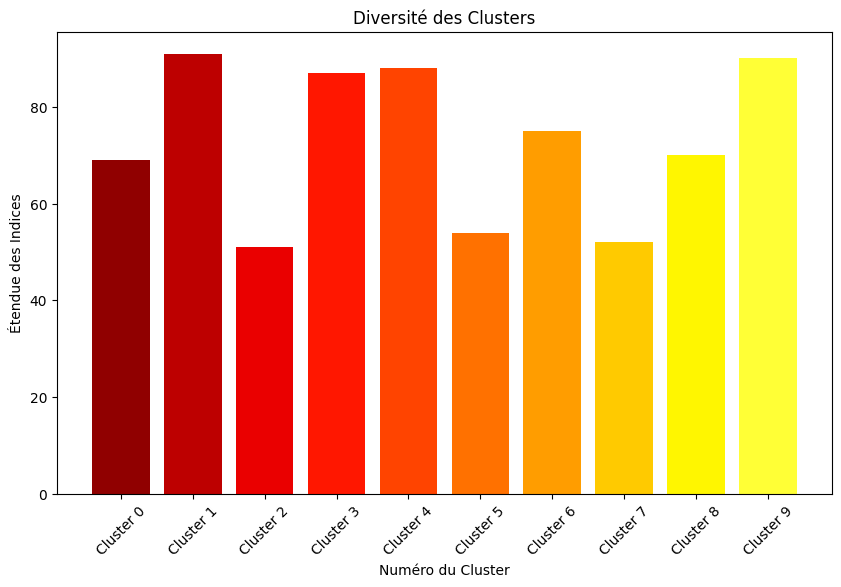

In [25]:
# Utilisation de la carte de couleurs 'hot' pour des couleurs chaudes
colors = plt.cm.hot(np.linspace(0.2, 0.8, len(cluster_diversity)))

plt.figure(figsize=(10, 6))
plt.bar(cluster_diversity.keys(), cluster_diversity.values(), color=colors)
plt.title('Diversité des Clusters')
plt.xlabel('Numéro du Cluster')
plt.ylabel('Étendue des Indices')
plt.xticks(list(cluster_diversity.keys()), rotation=45)
plt.show()